# Cluster Profiles
This notebook contains code to analyze Calo Cluster data, in order to check if the data is in order and its distributions.

In [1]:
from lzt_utils.dataset import LztDataset
from lzt_utils.utils import set_logger
import lzt_utils.plotting.pyplot as lplt
import mplhep
import matplotlib.pyplot as plt
import matplotlib as mpl
from pathlib import Path
import ROOT
import logging

Module libc not found.


In [2]:
ROOT.EnableImplicitMT()
plt.style.use(mplhep.style.ATLAS)
set_logger()
mpl.rc('text', usetex = True)

# Load data

In [3]:
lzt_data = Path.home() / 'ext_data' / 'lorenzetti'
output_dir = lzt_data / 'profiles' / 'boosted-lorenzetti-2025-04-18' / 'cluster_profile'
output_dir.mkdir(exist_ok=True, parents=True)
datasets = {}
datasets['zee'] = {
    'ds': LztDataset.from_dir(
        lzt_data / 'v2.1.0' / 'user.joao.pinto.mc25_13TeV.250401.Pythia8EvtGen_Zee'
    ),
    'color': 'blue',
    'label': '$Z \\to ee$',
}

datasets['jf17'] = {
    'ds': LztDataset.from_dir(
        lzt_data / 'v2.1.0' / 'user.joao.pinto.mc25_13TeV.250401.Pythia8EvtGen_JF17'
    ),
    'color': 'red',
    'label': 'Jets: $E \\geq 17GeV$'
}

datasets

{'zee': {'ds': LztDataset(path=/root/ext_data/lorenzetti/v2.1.0/user.joao.pinto.mc25_13TeV.250401.Pythia8EvtGen_Zee, label=Z->ee),
  'color': 'blue',
  'label': '$Z \\to ee$'},
 'jf17': {'ds': LztDataset(path=/root/ext_data/lorenzetti/v2.1.0/user.joao.pinto.mc25_13TeV.250401.Pythia8EvtGen_JF17, label=Jets et > 17GeV),
  'color': 'red',
  'label': 'Jets: $E \\geq 17GeV$'}}

In [4]:
for name, dataset_info in datasets.items():
    logging.info(f'Loading dataset {name}')
    datasets[name]['ntuple_pdf'] = dataset_info['ds'].get_ntuple_pdf()

2025-04-30 15:47:34 | INFO | root | 3153873118 | 2 | Loading dataset zee
2025-04-30 15:47:39 | INFO | root | 3153873118 | 2 | Loading dataset jf17


# Cluster Energy

2025-04-30 15:47:44 | INFO | root | 603096224 | 5 | Plotting dataset zee
2025-04-30 15:47:44 | INFO | root | 603096224 | 5 | Plotting dataset jf17


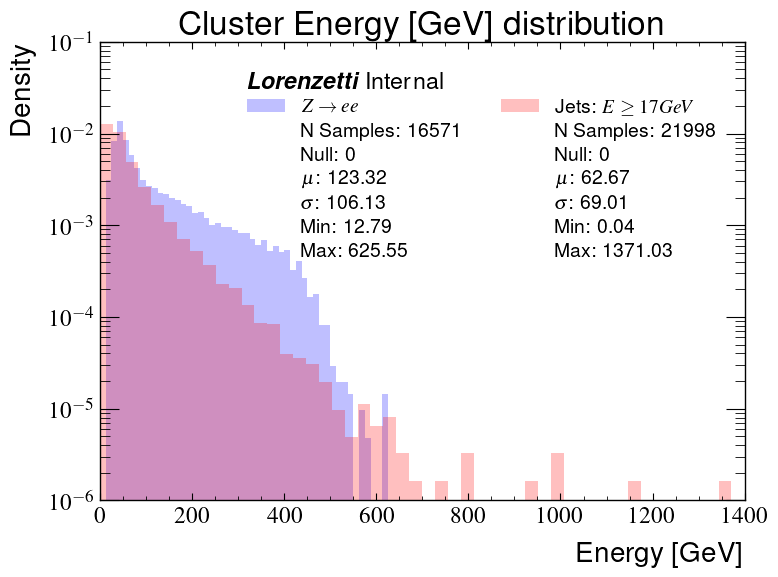

In [5]:
col_name = 'cl_e'
xlabel = 'Energy [GeV]'
fig, ax = plt.subplots()
for name, dataset_info in datasets.items():
    logging.info(f'Plotting dataset {name}')
    plotdata = dataset_info['ntuple_pdf'][col_name]/1000
    lplt.histplot(
        plotdata.dropna(),
        nbins=50,
        ax=ax,
        metrics=False,
        ax_set=dict(
            xlabel=xlabel,
            ylabel='Density',
            title=f'Cluster {xlabel} distribution',
            yscale='log'
        ),
        hist_kwargs=dict(
            histtype='stepfilled',
            label=dataset_info['label'],
            color=dataset_info['color'],
            density=True,
            alpha=0.25
        )
    )
    ax.plot([], [], ' ', label=f'N Samples: {len(plotdata)}')
    ax.plot([], [], ' ', label=f'Null: {plotdata.isnull().sum()}')
    ax.plot([], [], ' ', label=f'$\\mu$: {plotdata.mean():.2f}')
    ax.plot([], [], ' ', label=f'$\\sigma$: {plotdata.std():.2f}')
    ax.plot([], [], ' ', label=f'Min: {plotdata.min():.2f}')
    ax.plot([], [], ' ', label=f'Max: {plotdata.max():.2f}')
ax.legend(
    title='\\textbf{{\\textit{{Lorenzetti}}}} Internal',
    alignment='left',
    facecolor='white',
    ncols=len(datasets),
    title_fontproperties=dict(size='large')
)
fig.tight_layout()
# fig.savefig(output_dir/'cl_e_distribution.png', bbox_inches='tight', dpi=300)

# Cluster $E_T$

2025-04-30 15:48:17 | INFO | root | 263000825 | 5 | Plotting dataset zee
2025-04-30 15:48:17 | INFO | root | 263000825 | 5 | Plotting dataset jf17


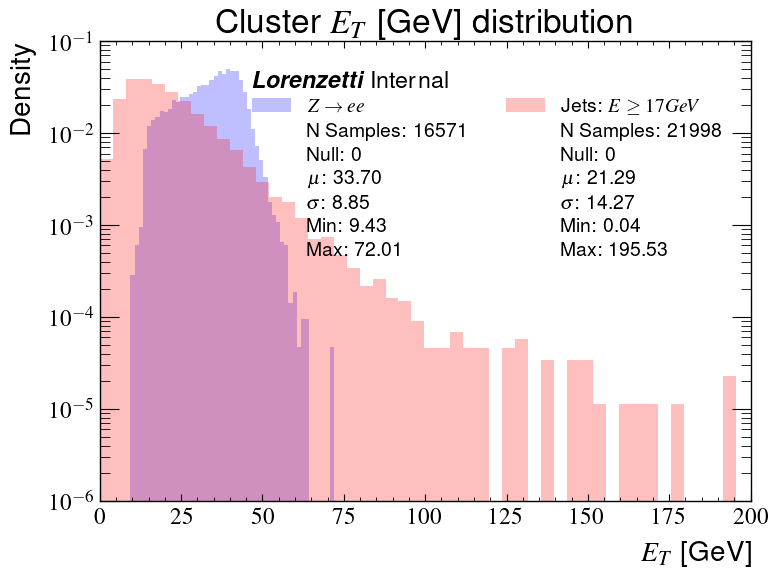

In [6]:
col_name = 'cl_et'
xlabel = '$E_T$ [GeV]'
fig, ax = plt.subplots()
for name, dataset_info in datasets.items():
    logging.info(f'Plotting dataset {name}')
    plotdata = dataset_info['ntuple_pdf'][col_name]/1000
    lplt.histplot(
        plotdata.dropna(),
        nbins=50,
        ax=ax,
        metrics=False,
        ax_set=dict(
            xlabel=xlabel,
            ylabel='Density',
            title=f'Cluster {xlabel} distribution',
            yscale='log'
        ),
        hist_kwargs=dict(
            histtype='stepfilled',
            label=dataset_info['label'],
            color=dataset_info['color'],
            density=True,
            alpha=0.25
        )
    )
    ax.plot([], [], ' ', label=f'N Samples: {len(plotdata)}')
    ax.plot([], [], ' ', label=f'Null: {plotdata.isnull().sum()}')
    ax.plot([], [], ' ', label=f'$\\mu$: {plotdata.mean():.2f}')
    ax.plot([], [], ' ', label=f'$\\sigma$: {plotdata.std():.2f}')
    ax.plot([], [], ' ', label=f'Min: {plotdata.min():.2f}')
    ax.plot([], [], ' ', label=f'Max: {plotdata.max():.2f}')
ax.legend(
    title='\\textbf{{\\textit{{Lorenzetti}}}} Internal',
    alignment='left',
    facecolor='white',
    ncols=len(datasets),
    title_fontproperties=dict(size='large')
)
fig.tight_layout()
fig.savefig(output_dir/'cl_et_distribution.png', bbox_inches='tight', dpi=300)

# Cluster $\eta$

2025-04-19 15:35:23 | INFO | root | 3589191083 | 5 | Plotting dataset zee
2025-04-19 15:35:23 | INFO | root | 3589191083 | 5 | Plotting dataset jf17


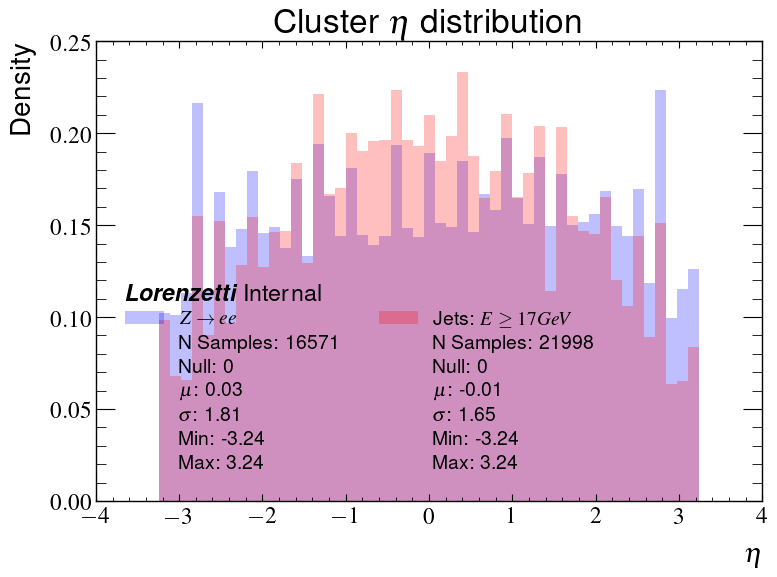

In [8]:
col_name = 'cl_eta'
xlabel = '$\\eta$'
fig, ax = plt.subplots()
for name, dataset_info in datasets.items():
    logging.info(f'Plotting dataset {name}')
    plotdata = dataset_info['ntuple_pdf'][col_name]
    lplt.histplot(
        plotdata.dropna(),
        nbins=50,
        ax=ax,
        metrics=False,
        ax_set=dict(
            xlabel=xlabel,
            ylabel='Density',
            title=f'Cluster {xlabel} distribution',
        ),
        hist_kwargs=dict(
            histtype='stepfilled',
            label=dataset_info['label'],
            color=dataset_info['color'],
            density=True,
            alpha=0.25
        )
    )
    ax.plot([], [], ' ', label=f'N Samples: {len(plotdata)}')
    ax.plot([], [], ' ', label=f'Null: {plotdata.isnull().sum()}')
    ax.plot([], [], ' ', label=f'$\\mu$: {plotdata.mean():.2f}')
    ax.plot([], [], ' ', label=f'$\\sigma$: {plotdata.std():.2f}')
    ax.plot([], [], ' ', label=f'Min: {plotdata.min():.2f}')
    ax.plot([], [], ' ', label=f'Max: {plotdata.max():.2f}')
ax.legend(
    title='\\textbf{{\\textit{{Lorenzetti}}}} Internal',
    alignment='left',
    facecolor='white',
    ncols=len(datasets),
    title_fontproperties=dict(size='large')
)
fig.tight_layout()
fig.savefig(output_dir/'cl_eta_distribution.png', bbox_inches='tight', dpi=300)

# Cluster $\phi$

2025-04-19 15:35:34 | INFO | root | 1653169240 | 5 | Plotting dataset zee
2025-04-19 15:35:34 | INFO | root | 1653169240 | 5 | Plotting dataset jf17


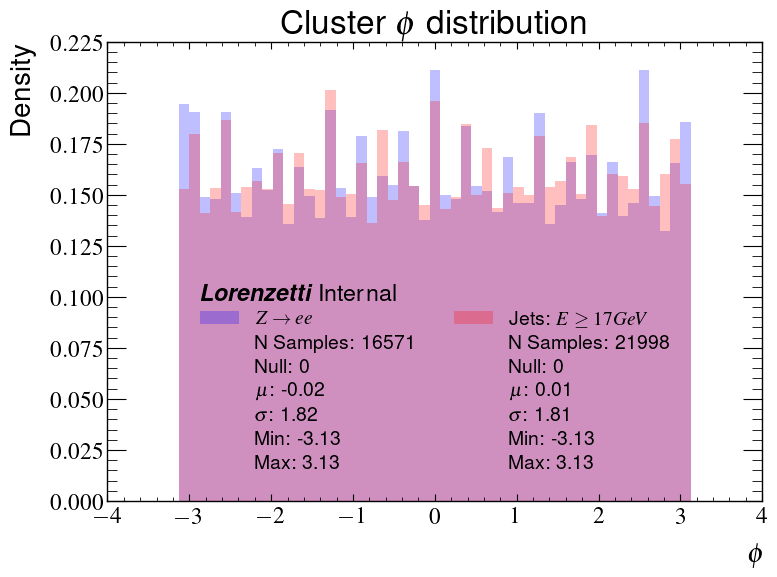

In [9]:
col_name = 'cl_phi'
xlabel = '$\\phi$'
fig, ax = plt.subplots()
for name, dataset_info in datasets.items():
    logging.info(f'Plotting dataset {name}')
    plotdata = dataset_info['ntuple_pdf'][col_name]
    lplt.histplot(
        plotdata.dropna(),
        nbins=50,
        ax=ax,
        metrics=False,
        ax_set=dict(
            xlabel=xlabel,
            ylabel='Density',
            title=f'Cluster {xlabel} distribution',
        ),
        hist_kwargs=dict(
            histtype='stepfilled',
            label=dataset_info['label'],
            color=dataset_info['color'],
            density=True,
            alpha=0.25
        )
    )
    ax.plot([], [], ' ', label=f'N Samples: {len(plotdata)}')
    ax.plot([], [], ' ', label=f'Null: {plotdata.isnull().sum()}')
    ax.plot([], [], ' ', label=f'$\\mu$: {plotdata.mean():.2f}')
    ax.plot([], [], ' ', label=f'$\\sigma$: {plotdata.std():.2f}')
    ax.plot([], [], ' ', label=f'Min: {plotdata.min():.2f}')
    ax.plot([], [], ' ', label=f'Max: {plotdata.max():.2f}')
ax.legend(
    title='\\textbf{{\\textit{{Lorenzetti}}}} Internal',
    alignment='left',
    facecolor='white',
    ncols=len(datasets),
    title_fontproperties=dict(size='large')
)
fig.tight_layout()
fig.savefig(output_dir/'cl_phi_distribution.png', bbox_inches='tight', dpi=300)

# Cluster $E_{ratio}$

2025-04-19 15:36:04 | INFO | root | 1566705096 | 5 | Plotting dataset zee
2025-04-19 15:36:04 | INFO | root | 1566705096 | 5 | Plotting dataset jf17


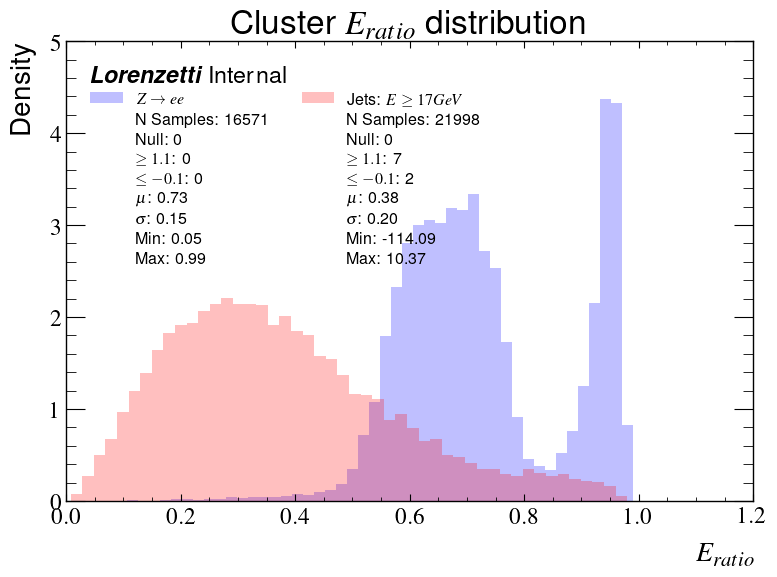

In [11]:
col_name = 'cl_eratio'
xlabel = '$E_{{ratio}}$'
fig, ax = plt.subplots()
for name, dataset_info in datasets.items():
    logging.info(f'Plotting dataset {name}')
    plotdata = dataset_info['ntuple_pdf'][col_name]
    over_limit = plotdata >= 1.1
    under_limit = plotdata <= -0.1
    is_null = plotdata.isnull()
    valid_samples = ~over_limit & ~under_limit & ~is_null
    valid_plotdata = plotdata[valid_samples]
    lplt.histplot(
        valid_plotdata,
        nbins=50,
        ax=ax,
        metrics=False,
        ax_set=dict(
            xlabel=xlabel,
            ylabel='Density',
            title=f'Cluster {xlabel} distribution',
        ),
        hist_kwargs=dict(
            histtype='stepfilled',
            label=dataset_info['label'],
            color=dataset_info['color'],
            density=True,
            alpha=0.25
        )
    )
    ax.plot([], [], ' ', label=f'N Samples: {len(plotdata)}')
    ax.plot([], [], ' ', label=f'Null: {is_null.sum()}')
    ax.plot([], [], ' ', label=f'$\\geq 1.1$: {over_limit.sum()}')
    ax.plot([], [], ' ', label=f'$\\leq -0.1$: {under_limit.sum()}')
    ax.plot([], [], ' ', label=f'$\\mu$: {valid_plotdata.mean():.2f}')
    ax.plot([], [], ' ', label=f'$\\sigma$: {valid_plotdata.std():.2f}')
    ax.plot([], [], ' ', label=f'Min: {plotdata.min():.2f}')
    ax.plot([], [], ' ', label=f'Max: {plotdata.max():.2f}')
ax.legend(
    title='\\textbf{{\\textit{{Lorenzetti}}}} Internal',
    alignment='left',
    facecolor='white',
    ncols=len(datasets),
    title_fontproperties=dict(size='large'),
    fontsize='small',
    loc='upper left'
)
fig.tight_layout()
fig.savefig(output_dir/'cl_eratio_distribution.png', bbox_inches='tight', dpi=300)

2025-04-30 15:51:22 | INFO | root | 431885432 | 6 | Plotting dataset zee
2025-04-30 15:51:22 | INFO | root | 431885432 | 6 | Plotting dataset jf17


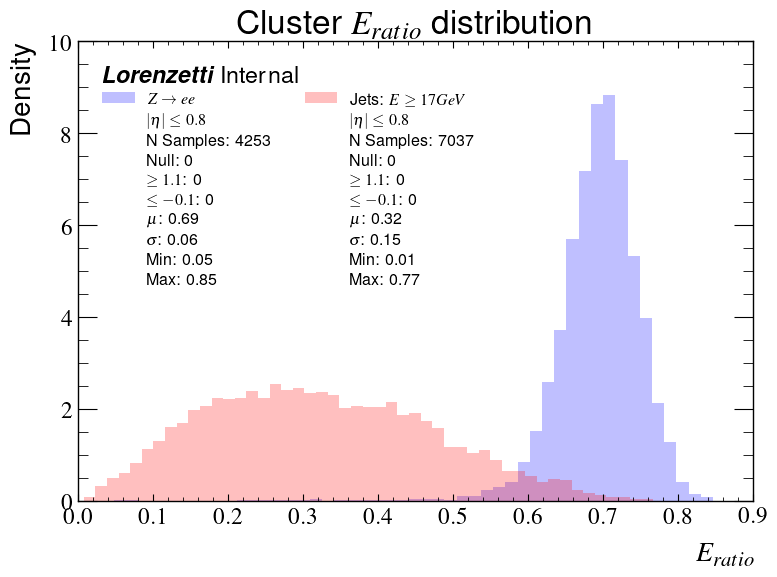

In [12]:
col_name = 'cl_eratio'
xlabel = '$E_{{ratio}}$'
eta_limit = 0.8
fig, ax = plt.subplots()
for name, dataset_info in datasets.items():
    logging.info(f'Plotting dataset {name}')
    plotdata = dataset_info['ntuple_pdf'][col_name]
    in_eta_range = dataset_info['ntuple_pdf']['cl_eta'].abs() <= eta_limit
    plotdata = plotdata[in_eta_range]
    over_limit = plotdata >= 1.1
    under_limit = plotdata <= -0.1
    is_null = plotdata.isnull()
    valid_samples = ~over_limit & ~under_limit & ~is_null
    valid_plotdata = plotdata[valid_samples]
    lplt.histplot(
        valid_plotdata,
        nbins=50,
        ax=ax,
        metrics=False,
        ax_set=dict(
            xlabel=xlabel,
            ylabel='Density',
            title=f'Cluster {xlabel} distribution',
        ),
        hist_kwargs=dict(
            histtype='stepfilled',
            label=dataset_info['label'],
            color=dataset_info['color'],
            density=True,
            alpha=0.25
        )
    )
    ax.plot([], [], ' ', label=f'$|\\eta| \leq {eta_limit}$')
    ax.plot([], [], ' ', label=f'N Samples: {len(plotdata)}')
    ax.plot([], [], ' ', label=f'Null: {is_null.sum()}')
    ax.plot([], [], ' ', label=f'$\\geq 1.1$: {over_limit.sum()}')
    ax.plot([], [], ' ', label=f'$\\leq -0.1$: {under_limit.sum()}')
    ax.plot([], [], ' ', label=f'$\\mu$: {valid_plotdata.mean():.2f}')
    ax.plot([], [], ' ', label=f'$\\sigma$: {valid_plotdata.std():.2f}')
    ax.plot([], [], ' ', label=f'Min: {plotdata.min():.2f}')
    ax.plot([], [], ' ', label=f'Max: {plotdata.max():.2f}')
ax.legend(
    title=('\\textbf{{\\textit{{Lorenzetti}}}} Internal'),
    alignment='left',
    facecolor='white',
    ncols=len(datasets),
    title_fontproperties=dict(size='large'),
    fontsize='small',
    loc='upper left'
)
fig.tight_layout()
fig.savefig(output_dir/f'cl_eratio__abs_cl_eta_lower_{eta_limit}_distribution.png',
            bbox_inches='tight', dpi=300)

## $\eta \times E_{ratio}$

2025-04-19 15:39:11 | INFO | root | 506739488 | 7 | Plotting dataset zee


/tmp/ipykernel_52886/506739488.py:38: UserWarning: Tight layout not applied. tight_layout cannot make Axes width small enough to accommodate all Axes decorations
  jgrid.figure.tight_layout()


2025-04-19 15:39:12 | INFO | root | 506739488 | 7 | Plotting dataset jf17


/tmp/ipykernel_52886/506739488.py:38: UserWarning: Tight layout not applied. tight_layout cannot make Axes width small enough to accommodate all Axes decorations
  jgrid.figure.tight_layout()


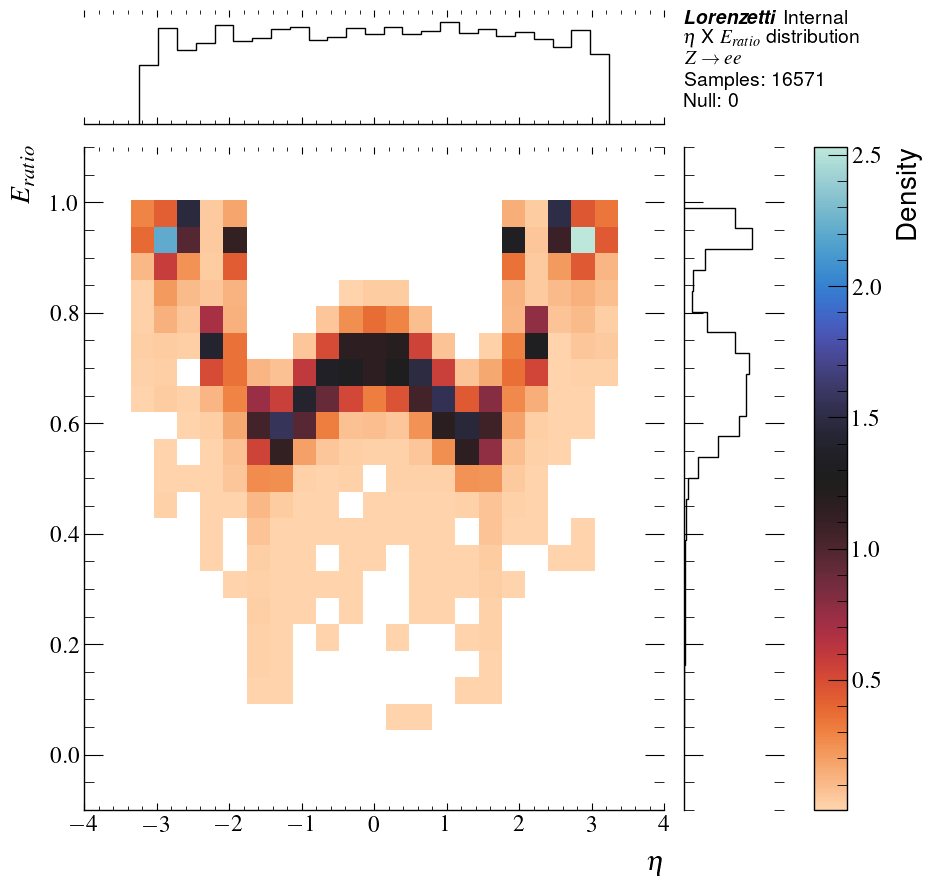

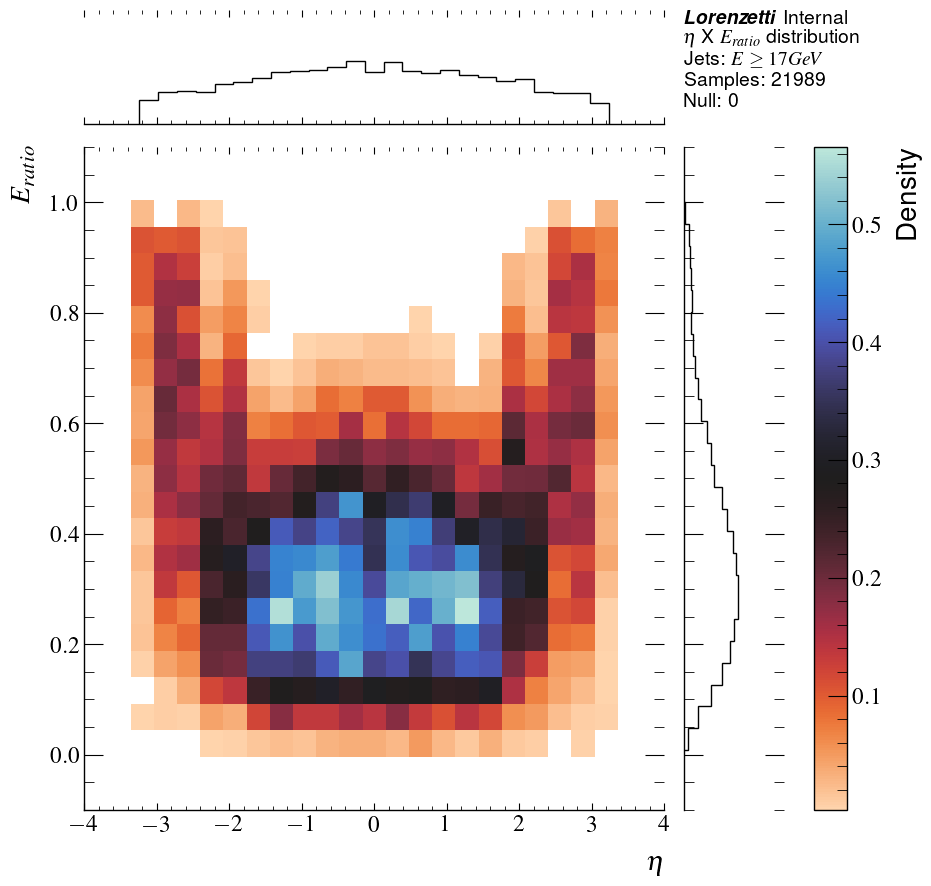

In [13]:
x_col = 'cl_eta'
xlabel = '$\\eta$'
y_col = 'cl_eratio'
ylabel = '$E_{{ratio}}$'

for name, dataset_info in datasets.items():
    logging.info(f'Plotting dataset {name}')
    over_limit = dataset_info['ntuple_pdf'][y_col] >= 1.1
    under_limit = dataset_info['ntuple_pdf'][y_col] <= -0.1
    is_null = dataset_info['ntuple_pdf'][y_col].isnull()
    valid_samples = ~over_limit & ~under_limit & ~is_null
    valid_plotdata = dataset_info['ntuple_pdf'].loc[valid_samples, [x_col, y_col]]
    corner_text = ('\\textbf{{\\textit{{Lorenzetti}}}} Internal\n'
                   f'{xlabel} X {ylabel} distribution\n'
                   f'{dataset_info["label"]}\n'
                   f'Samples: {len(valid_plotdata)}\n'
                   f'Null: {is_null.sum()}')
    jgrid, _ = lplt.hist2dplot(
        valid_plotdata,
        x=x_col,
        xlabel=xlabel,
        xaxis_hist_kwargs=dict(
            bins=25
        ),
        y=y_col,
        ylabel=ylabel,
        ylim=(-0.1, 1.1),
        yaxis_hist_kwargs=dict(
            bins=25
        ),
        joint_hist_kwargs=dict(
            cmap='icefire_r'
        ),
        norm='linear',
        corner_text=corner_text,
        figsize=(10, 10),
    )
    jgrid.figure.tight_layout()
    jgrid.savefig(output_dir / f'{x_col}_{y_col}_{name}_distribution.png', bbox_inches='tight', dpi=300)

# Cluster $R_{had}$

2025-04-19 15:40:29 | INFO | root | 2816193831 | 5 | Plotting dataset zee
2025-04-19 15:40:30 | INFO | root | 2816193831 | 5 | Plotting dataset jf17


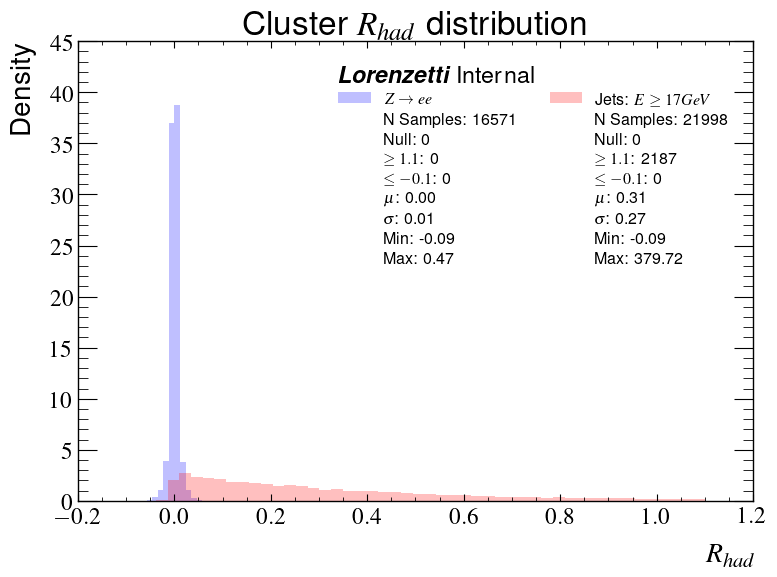

In [14]:
col_name = 'cl_rhad'
xlabel = '$R_{{had}}$'
fig, ax = plt.subplots()
for name, dataset_info in datasets.items():
    logging.info(f'Plotting dataset {name}')
    plotdata = dataset_info['ntuple_pdf'][col_name]
    over_limit = plotdata >= 1.1
    under_limit = plotdata <= -0.1
    is_null = plotdata.isnull()
    valid_samples = ~over_limit & ~under_limit & ~is_null
    valid_plotdata = plotdata[valid_samples]
    lplt.histplot(
        valid_plotdata,
        nbins=50,
        ax=ax,
        metrics=False,
        ax_set=dict(
            xlabel=xlabel,
            ylabel='Density',
            title=f'Cluster {xlabel} distribution',
        ),
        hist_kwargs=dict(
            histtype='stepfilled',
            label=dataset_info['label'],
            color=dataset_info['color'],
            density=True,
            alpha=0.25
        )
    )
    ax.plot([], [], ' ', label=f'N Samples: {len(plotdata)}')
    ax.plot([], [], ' ', label=f'Null: {is_null.sum()}')
    ax.plot([], [], ' ', label=f'$\\geq 1.1$: {over_limit.sum()}')
    ax.plot([], [], ' ', label=f'$\\leq -0.1$: {under_limit.sum()}')
    ax.plot([], [], ' ', label=f'$\\mu$: {valid_plotdata.mean():.2f}')
    ax.plot([], [], ' ', label=f'$\\sigma$: {valid_plotdata.std():.2f}')
    ax.plot([], [], ' ', label=f'Min: {plotdata.min():.2f}')
    ax.plot([], [], ' ', label=f'Max: {plotdata.max():.2f}')
ax.legend(
    title='\\textbf{{\\textit{{Lorenzetti}}}} Internal',
    alignment='left',
    facecolor='white',
    ncols=len(datasets),
    title_fontproperties=dict(size='large'),
    fontsize='small'
)
fig.tight_layout()
fig.savefig(output_dir/'cl_e_distribution.png', bbox_inches='tight', dpi=300)